<a href="https://colab.research.google.com/github/JMGErie/SAE-Steel-Prediction/blob/main/steel_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing all the pertinent libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
import os
import graphviz as graphviz
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from google.colab import data_table
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import xgboost as xgb
import sklearn.base
from sklearn.inspection import PartialDependenceDisplay
#pip install shap==0.23.0
#pip install -I shap
#pip install _fit_context

#import shap

In [3]:
#accessing google drive and downloading the file:

# Import necessary libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create GoogleDrive object
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# downloading the file from Google Drive using its file ID
file_id = '12vGN-ovDk8-tdTDeQJOGnVZ9D2RdtbBW'  # Replace with your file ID
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('steel_strength.csv')

In [8]:
from google.colab import files
uploaded = files.upload()

# Once uploaded, you can read the CSV file like this:
steel = pd.read_csv('steel_short_a.csv')
steel.head()


Saving steel_short_a.csv to steel_short_a (1).csv


,SAE Grade,Conditions,tensile strength,yield strength,Hardness (HB),C (Min),C (Max),Mn (Min),Mn (Max),P (Min),...,Si (Min),Si (Max),Ni (Min),Ni (Max),Cr (Min),Cr (Max),Mo (Min),Mo (Max),Ti (Min),Ti (Max)
0,1006,Hot rolled,295,165,86.0,0.00,0.08,0.25,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,1006,Cold drawn,330,285,95.0,0.00,0.08,0.25,0.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1008,Hot rolled,305,170,86.0,0.00,0.10,0.30,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,1008,Cold drawn,340,285,95.0,0.00,0.10,0.30,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,1010,Hot rolled,325,180,95.0,0.08,0.13,0.30,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [6]:
import os
import pandas as pd

# Change directory to where the file is located
os.chdir('/Users/jmgerie/Desktop/')

# Now read the CSV file into a DataFrame
steel = pd.read_csv('steel_short_a.csv')

# Display the first few rows of the DataFrame to verify
print(steel.head())



FileNotFoundError: [Errno 2] No such file or directory: '/Users/jmgerie/Desktop/'

In [9]:
#visializing the df
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SAE Grade         172 non-null    object 
 1   Conditions        172 non-null    object 
 2   tensile strength  172 non-null    int64  
 3   yield strength    172 non-null    int64  
 4   Hardness (HB)     132 non-null    float64
 5   C (Min)           172 non-null    float64
 6   C (Max)           172 non-null    float64
 7   Mn (Min)          172 non-null    float64
 8   Mn (Max)          172 non-null    float64
 9   P (Min)           172 non-null    float64
 10  P (Max)           172 non-null    float64
 11  S (Min)           172 non-null    float64
 12  S(Max)            172 non-null    float64
 13  Si (Min)          172 non-null    float64
 14  Si (Max)          172 non-null    float64
 15  Ni (Min)          172 non-null    float64
 16  Ni (Max)          172 non-null    float64
 1

In [10]:
# Analysing the target columns:
steel[["yield strength", "tensile strength"]].describe()


,yield strength,tensile strength
count,172.000000,172.000000
mean,487.645349,655.523256
std,216.345529,217.810784
min,165.000000,295.000000
25%,325.000000,493.750000
50%,465.000000,650.000000
75%,595.000000,770.000000
max,1340.000000,1470.000000


<ipython-input-11-ba637c4c698a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(steel[column])


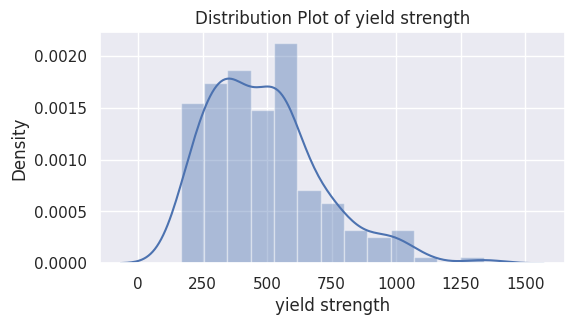

<ipython-input-11-ba637c4c698a>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(steel[column])


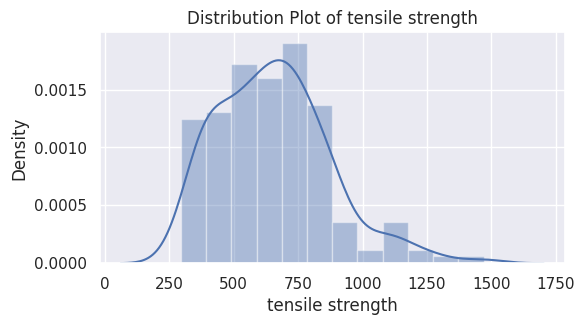

In [11]:
# Visializing the target columns:
distributions = ['yield strength', 'tensile strength']
for column in distributions:
    plt.figure(figsize=(6, 3))
    sns.distplot(steel[column])
    plt.title(f'Distribution Plot of {column}')
    plt.show()

In [13]:
#creating visualizing dataset
#sns.pairplot(steel);
#plt.title('Pair Plot of Steel')
#plt.savefig("Pair Plot of Steel")

In [14]:
# Set the "formula" column as the index
steel.set_index("SAE Grade", inplace=True)

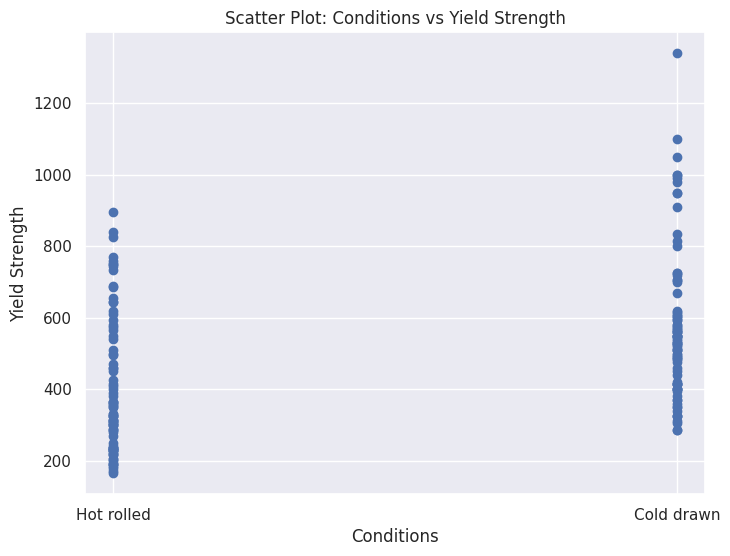

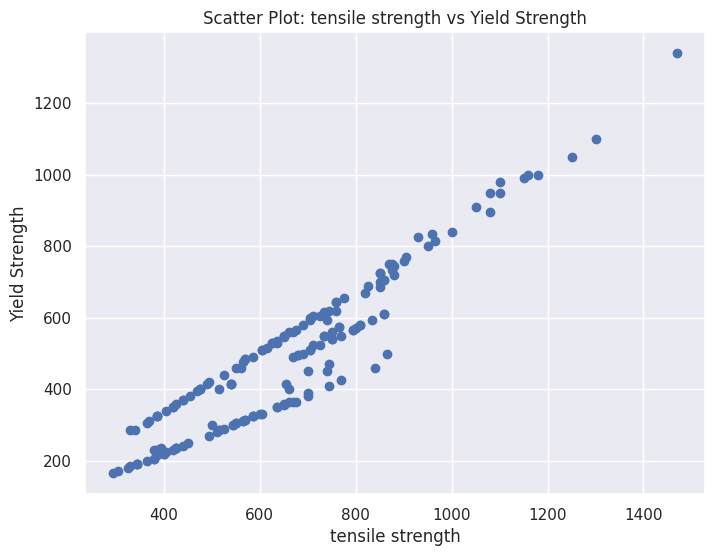

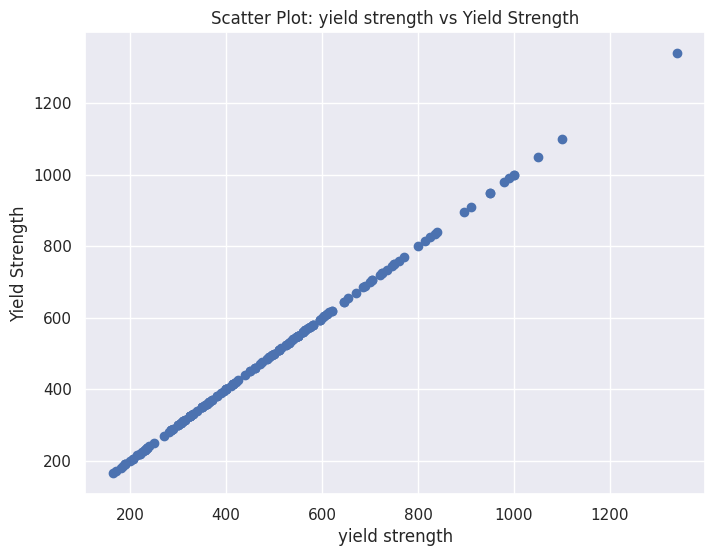

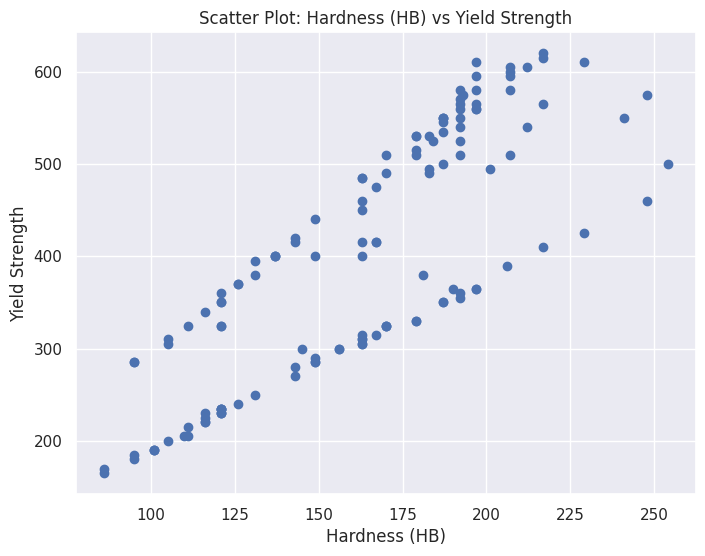

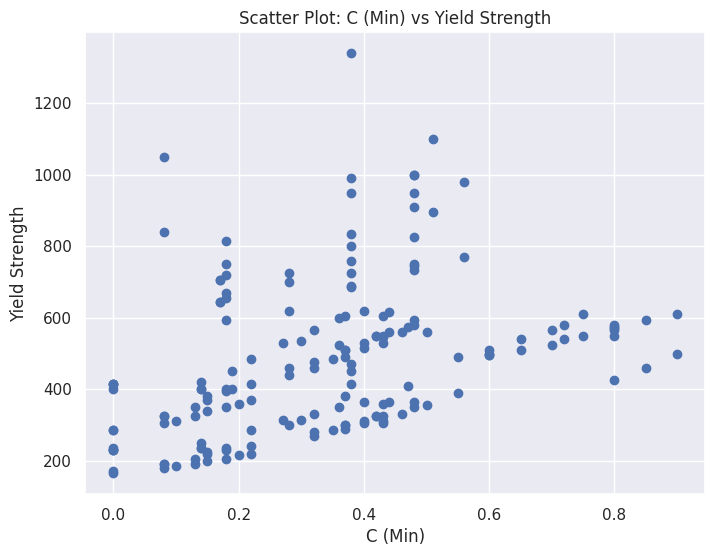

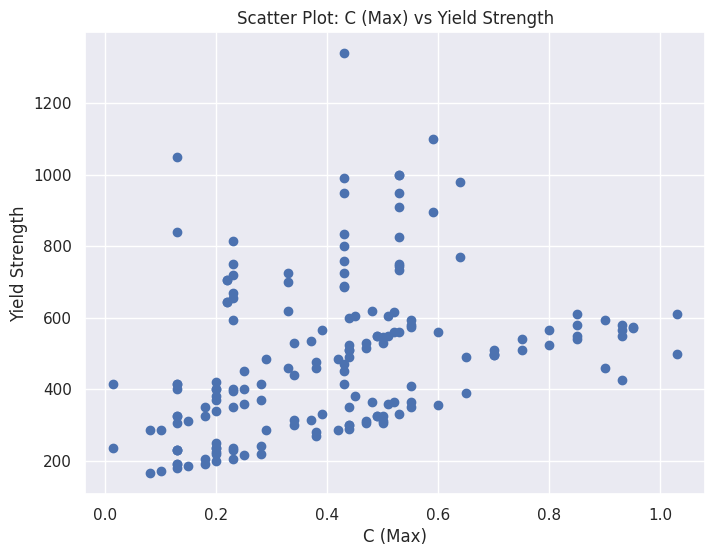

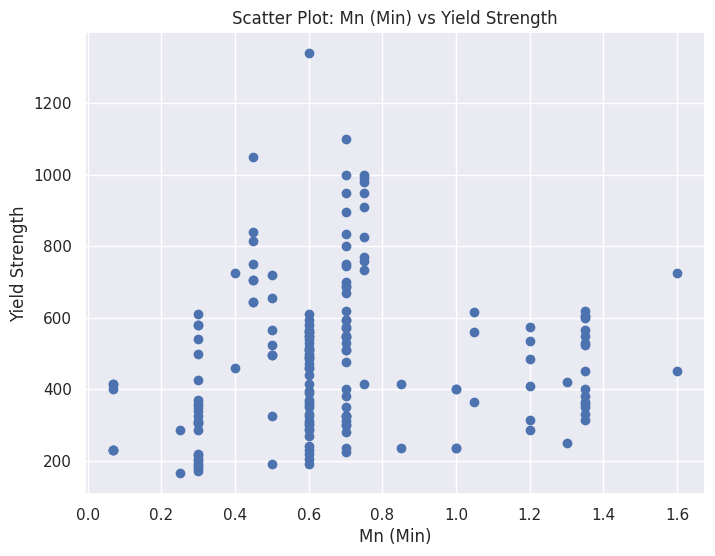

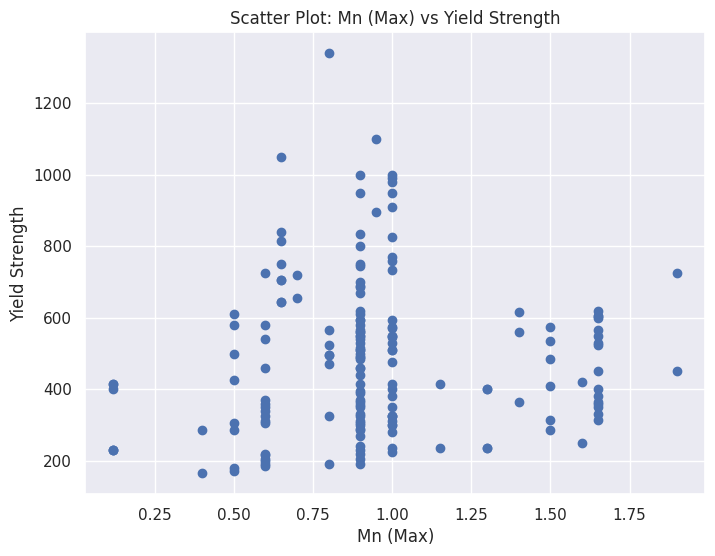

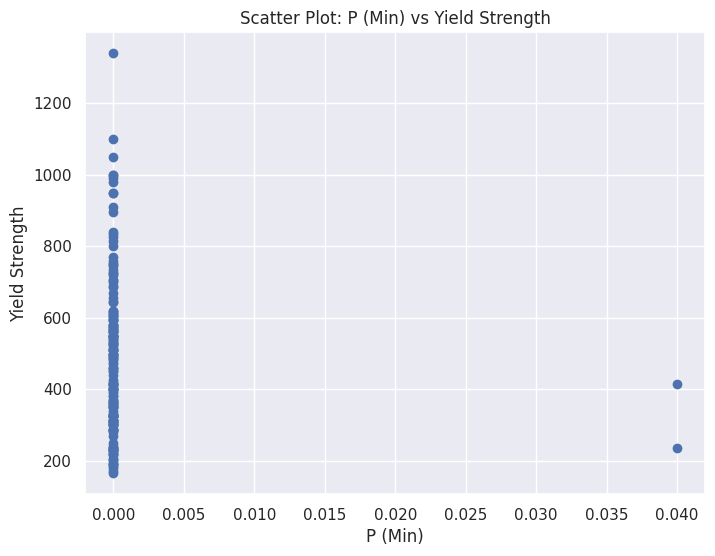

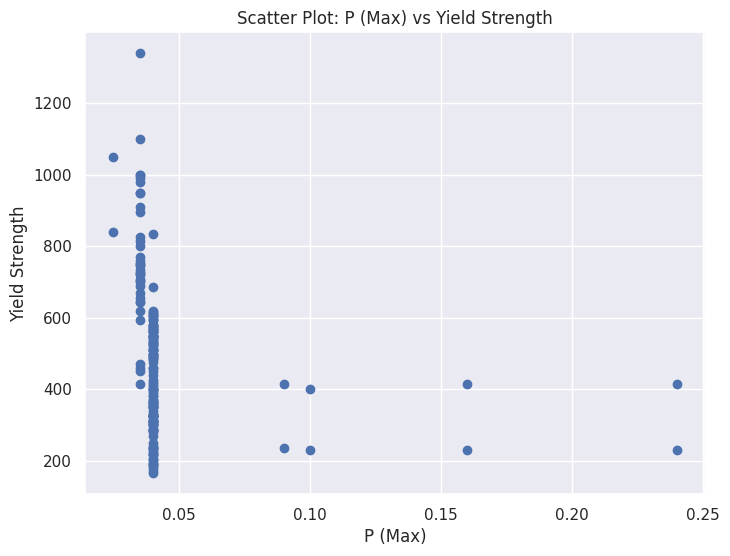

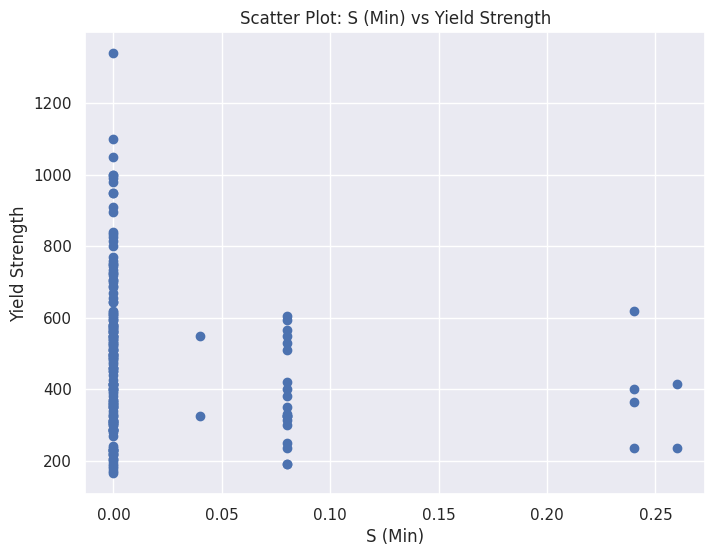

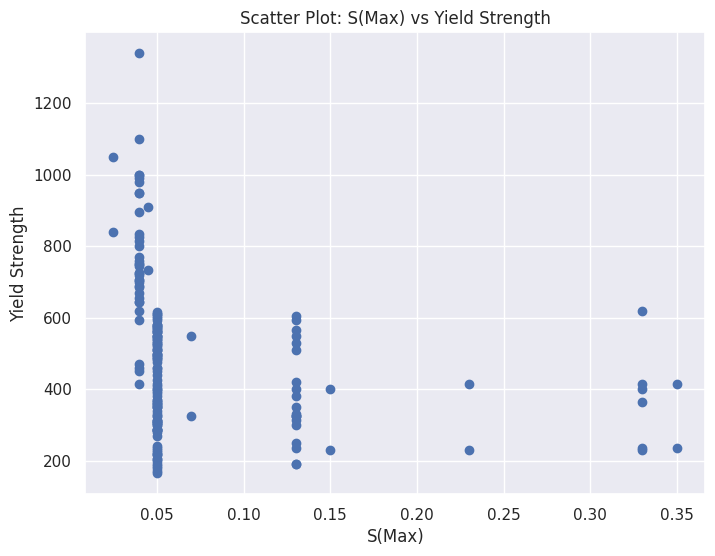

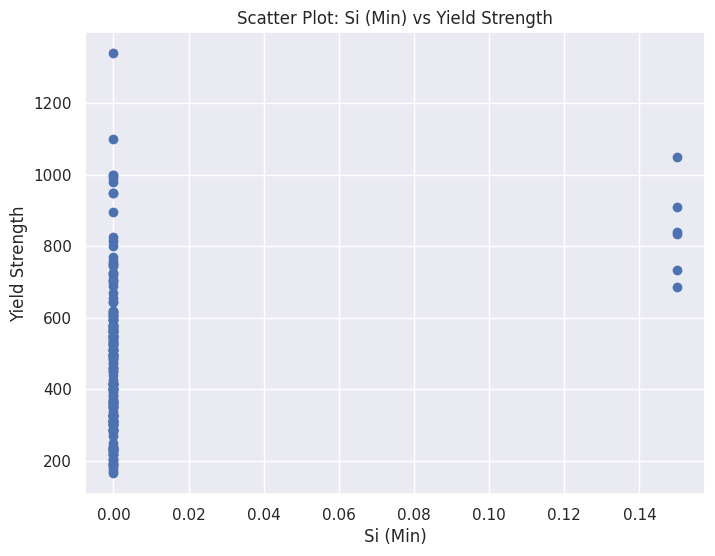

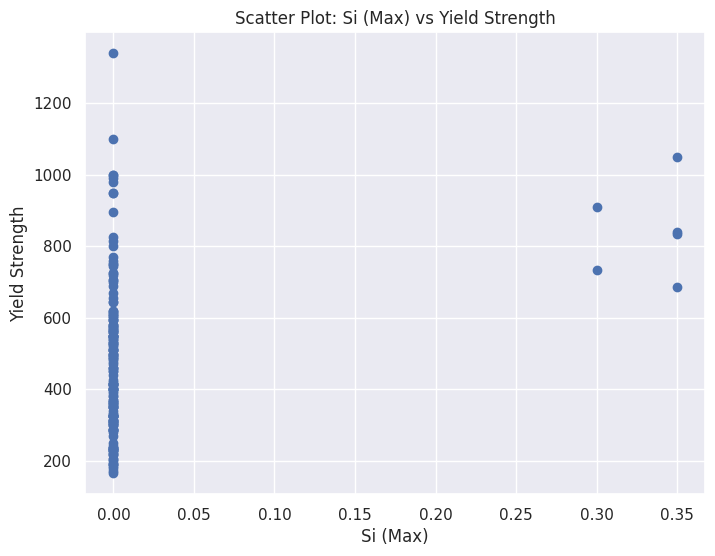

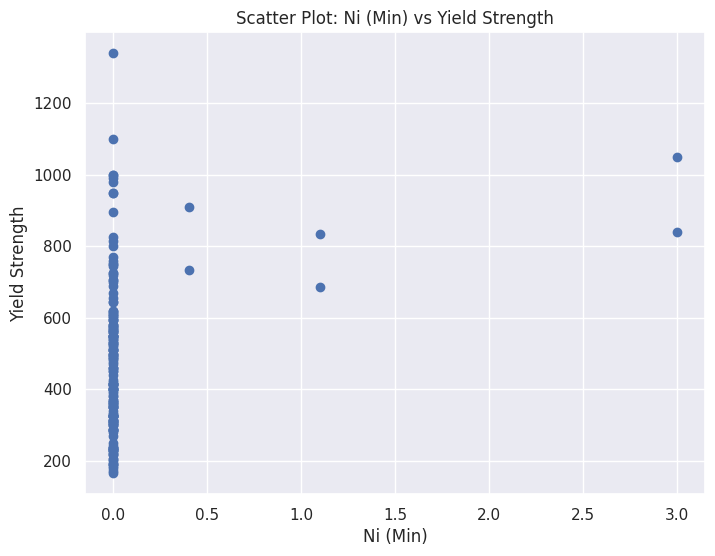

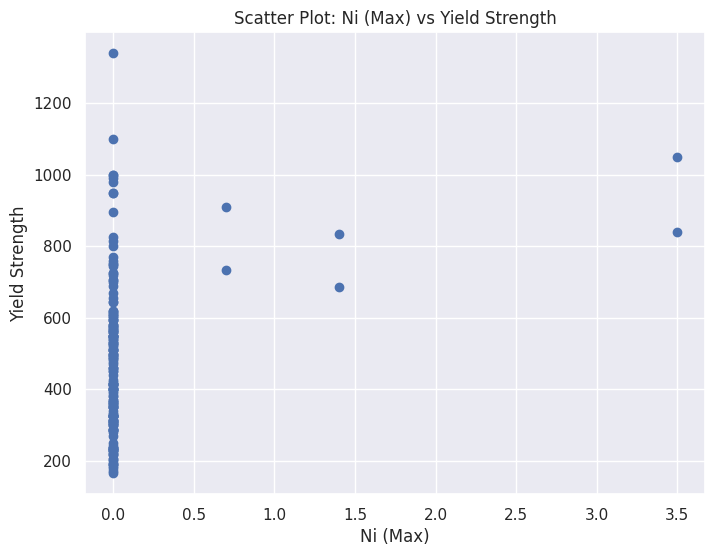

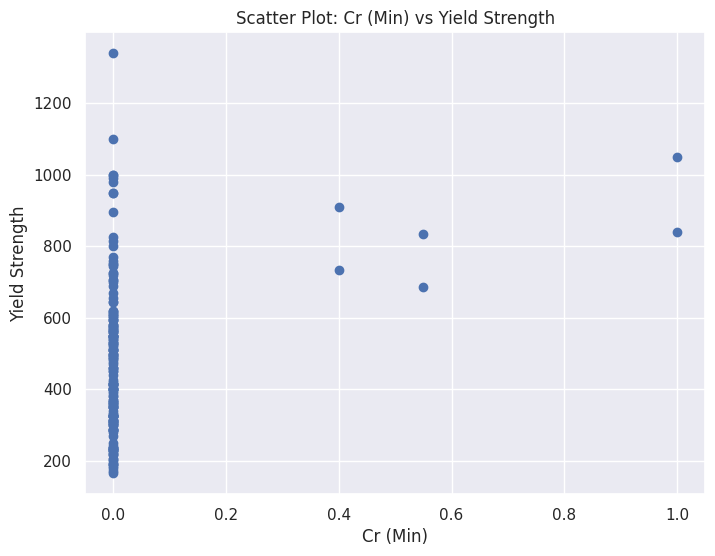

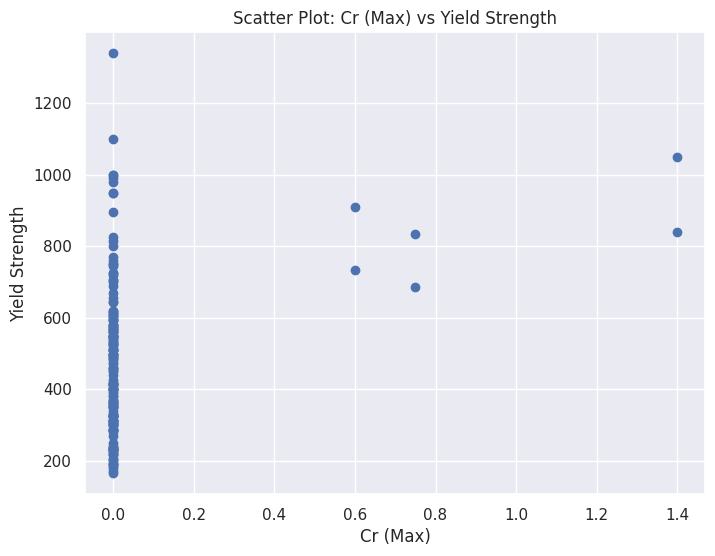

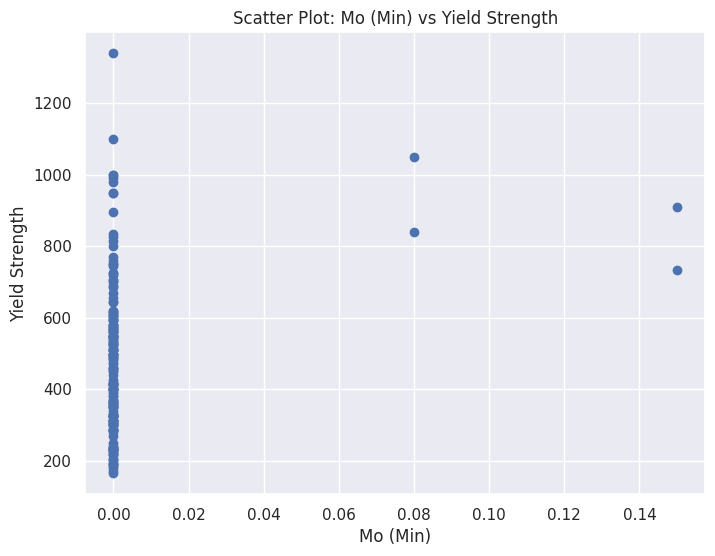

In [15]:
# PLotting yield strength as a function of the different features to visualize any correlation
columns = steel.columns[:-3]  # All columns except 'yield strength'

for col in columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(steel[col], steel['yield strength'])
    plt.title(f'Scatter Plot: {col} vs Yield Strength')
    plt.xlabel(col)
    plt.ylabel('Yield Strength')
    plt.grid(True)
    plt.show()


In [16]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 1006 to 9310
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Conditions        172 non-null    object 
 1   tensile strength  172 non-null    int64  
 2   yield strength    172 non-null    int64  
 3   Hardness (HB)     132 non-null    float64
 4   C (Min)           172 non-null    float64
 5   C (Max)           172 non-null    float64
 6   Mn (Min)          172 non-null    float64
 7   Mn (Max)          172 non-null    float64
 8   P (Min)           172 non-null    float64
 9   P (Max)           172 non-null    float64
 10  S (Min)           172 non-null    float64
 11  S(Max)            172 non-null    float64
 12  Si (Min)          172 non-null    float64
 13  Si (Max)          172 non-null    float64
 14  Ni (Min)          172 non-null    float64
 15  Ni (Max)          172 non-null    float64
 16  Cr (Min)          172 non-null    float64
 17

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Fill NaN values with zeroes in specific columns
columns_to_fill = ['C (Min)', 'C (Max)', 'Mn (Min)', 'Mn (Max)', 'P (Min)',
                   'P (Max)', 'S (Min)', 'S(Max)', 'Si (Min)', 'Si (Max)',
                   'Ni (Min)', 'Ni (Max)', 'Cr (Min)', 'Cr (Max)', 'Mo (Min)',
                   'Mo (Max)', 'Ti (Min)', 'Ti (Max)']
steel[columns_to_fill] = steel[columns_to_fill].fillna(0)

# One-hot encode the "Conditions" column
steel = pd.get_dummies(steel, columns=['Conditions'])

# Separate the features into X and target into y
X = steel.drop(labels=["yield strength", "tensile strength", "Hardness (HB)"], axis=1)
y = steel["yield strength"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame for easier interpretation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the information of the scaled DataFrame
X_scaled_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   C (Min)                172 non-null    float64
 1   C (Max)                172 non-null    float64
 2   Mn (Min)               172 non-null    float64
 3   Mn (Max)               172 non-null    float64
 4   P (Min)                172 non-null    float64
 5   P (Max)                172 non-null    float64
 6   S (Min)                172 non-null    float64
 7   S(Max)                 172 non-null    float64
 8   Si (Min)               172 non-null    float64
 9   Si (Max)               172 non-null    float64
 10  Ni (Min)               172 non-null    float64
 11  Ni (Max)               172 non-null    float64
 12  Cr (Min)               172 non-null    float64
 13  Cr (Max)               172 non-null    float64
 14  Mo (Min)               172 non-null    float64
 15  Mo (Ma

In [19]:
# Plotting fe Vs yield strength to see if there are any patterns or any visible correlations.
#plt.figure(figsize=(8, 6))
#import matplotlib.pyplot as plt
#plt.scatter(X["fe"], steel['yield strength'])
#plt.title('Scatter Plot: Fe vs Yield Strength')
#plt.xlabel('Fe composition')
#plt.ylabel('Yield Strength')
#plt.grid(True)
#plt.show()

In [20]:
#inspecting the target y
y.info()

<class 'pandas.core.series.Series'>
Index: 172 entries, 1006 to 9310
Series name: yield strength
Non-Null Count  Dtype
--------------  -----
172 non-null    int64
dtypes: int64(1)
memory usage: 6.8+ KB


In [21]:
# Creating a dataframe to store the model performances

# Initialize an empty DataFrame
models = pd.DataFrame(columns=["Model", "MSE", "Predictions % below E"])

# defining a function to update the "models" df
def update_models(df, model_name, mse, predictions_below_error):
    new_row = pd.DataFrame({
        "Model": [model_name],
        "MSE": [mse],
        "Predictions % below E": [predictions_below_error]
    })
    return pd.concat([df, new_row], ignore_index=True)



In [22]:
# creating constant "E" which will be defined as the acceptable single prediction error. I am initially setting it to 10%.
E = 10

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [24]:
# Random Forest Regression model
# Dwfining and trainning the Random Forest Regression model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

# Make predictions on the test set
rfr_predictions = rfr_model.predict(X_test)

# Evaluate the model
rfr_mse = mean_squared_error(y_test, rfr_predictions)
print("Random Forrest Regressor Mean Squared Error:", rfr_mse)


Random Forrest Regressor Mean Squared Error: 3763.0414095440597


In [25]:
# adding a prediction column using X to the steel dataframe
steel["rfr_ys_preds"] =rfr_model.predict(X)

In [26]:
# creating a column for the percentage of the relative error for each row
steel["rfr_ys_preds_%"] = abs(100 * (steel["rfr_ys_preds"] - steel["yield strength"]) / steel["yield strength"])


In [27]:
# Create a DataFrame to store predictions with absolute error less or equal to E
good_ys_preds_rfr = steel["rfr_ys_preds_%"] <= E

# Count the number of "Good" predictions
good_count = good_ys_preds_rfr.value_counts()[True]

# Calculate the percentage of "Good" predictions
rfr_percentage_good = (good_count / len(steel["rfr_ys_preds_%"])) * 100

print("The percentage of Yield Strength Random Forrest Predictions within E % of Actual value is:", rfr_percentage_good)


The percentage of Yield Strength Random Forrest Predictions within E % of Actual value is: 20.930232558139537


In [28]:
# Update the "models"
models = update_models(models, "Simple Random Forest Regression", rfr_mse, rfr_percentage_good)


<ipython-input-21-c35b33a427ec>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat([df, new_row], ignore_index=True)


In [29]:
# Getting feature importances from the Random Forrest Model
feature_importances = rfr_model.feature_importances_

# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

C (Min): 0.092
C (Max): 0.163
Mn (Min): 0.031
Mn (Max): 0.033
P (Min): 0.000
P (Max): 0.026
S (Min): 0.001
S(Max): 0.493
Si (Min): 0.000
Si (Max): 0.001
Ni (Min): 0.002
Ni (Max): 0.001
Cr (Min): 0.002
Cr (Max): 0.003
Mo (Min): 0.003
Mo (Max): 0.001
Ti (Min): 0.000
Ti (Max): 0.000
Conditions_Cold drawn: 0.072
Conditions_Hot rolled: 0.077


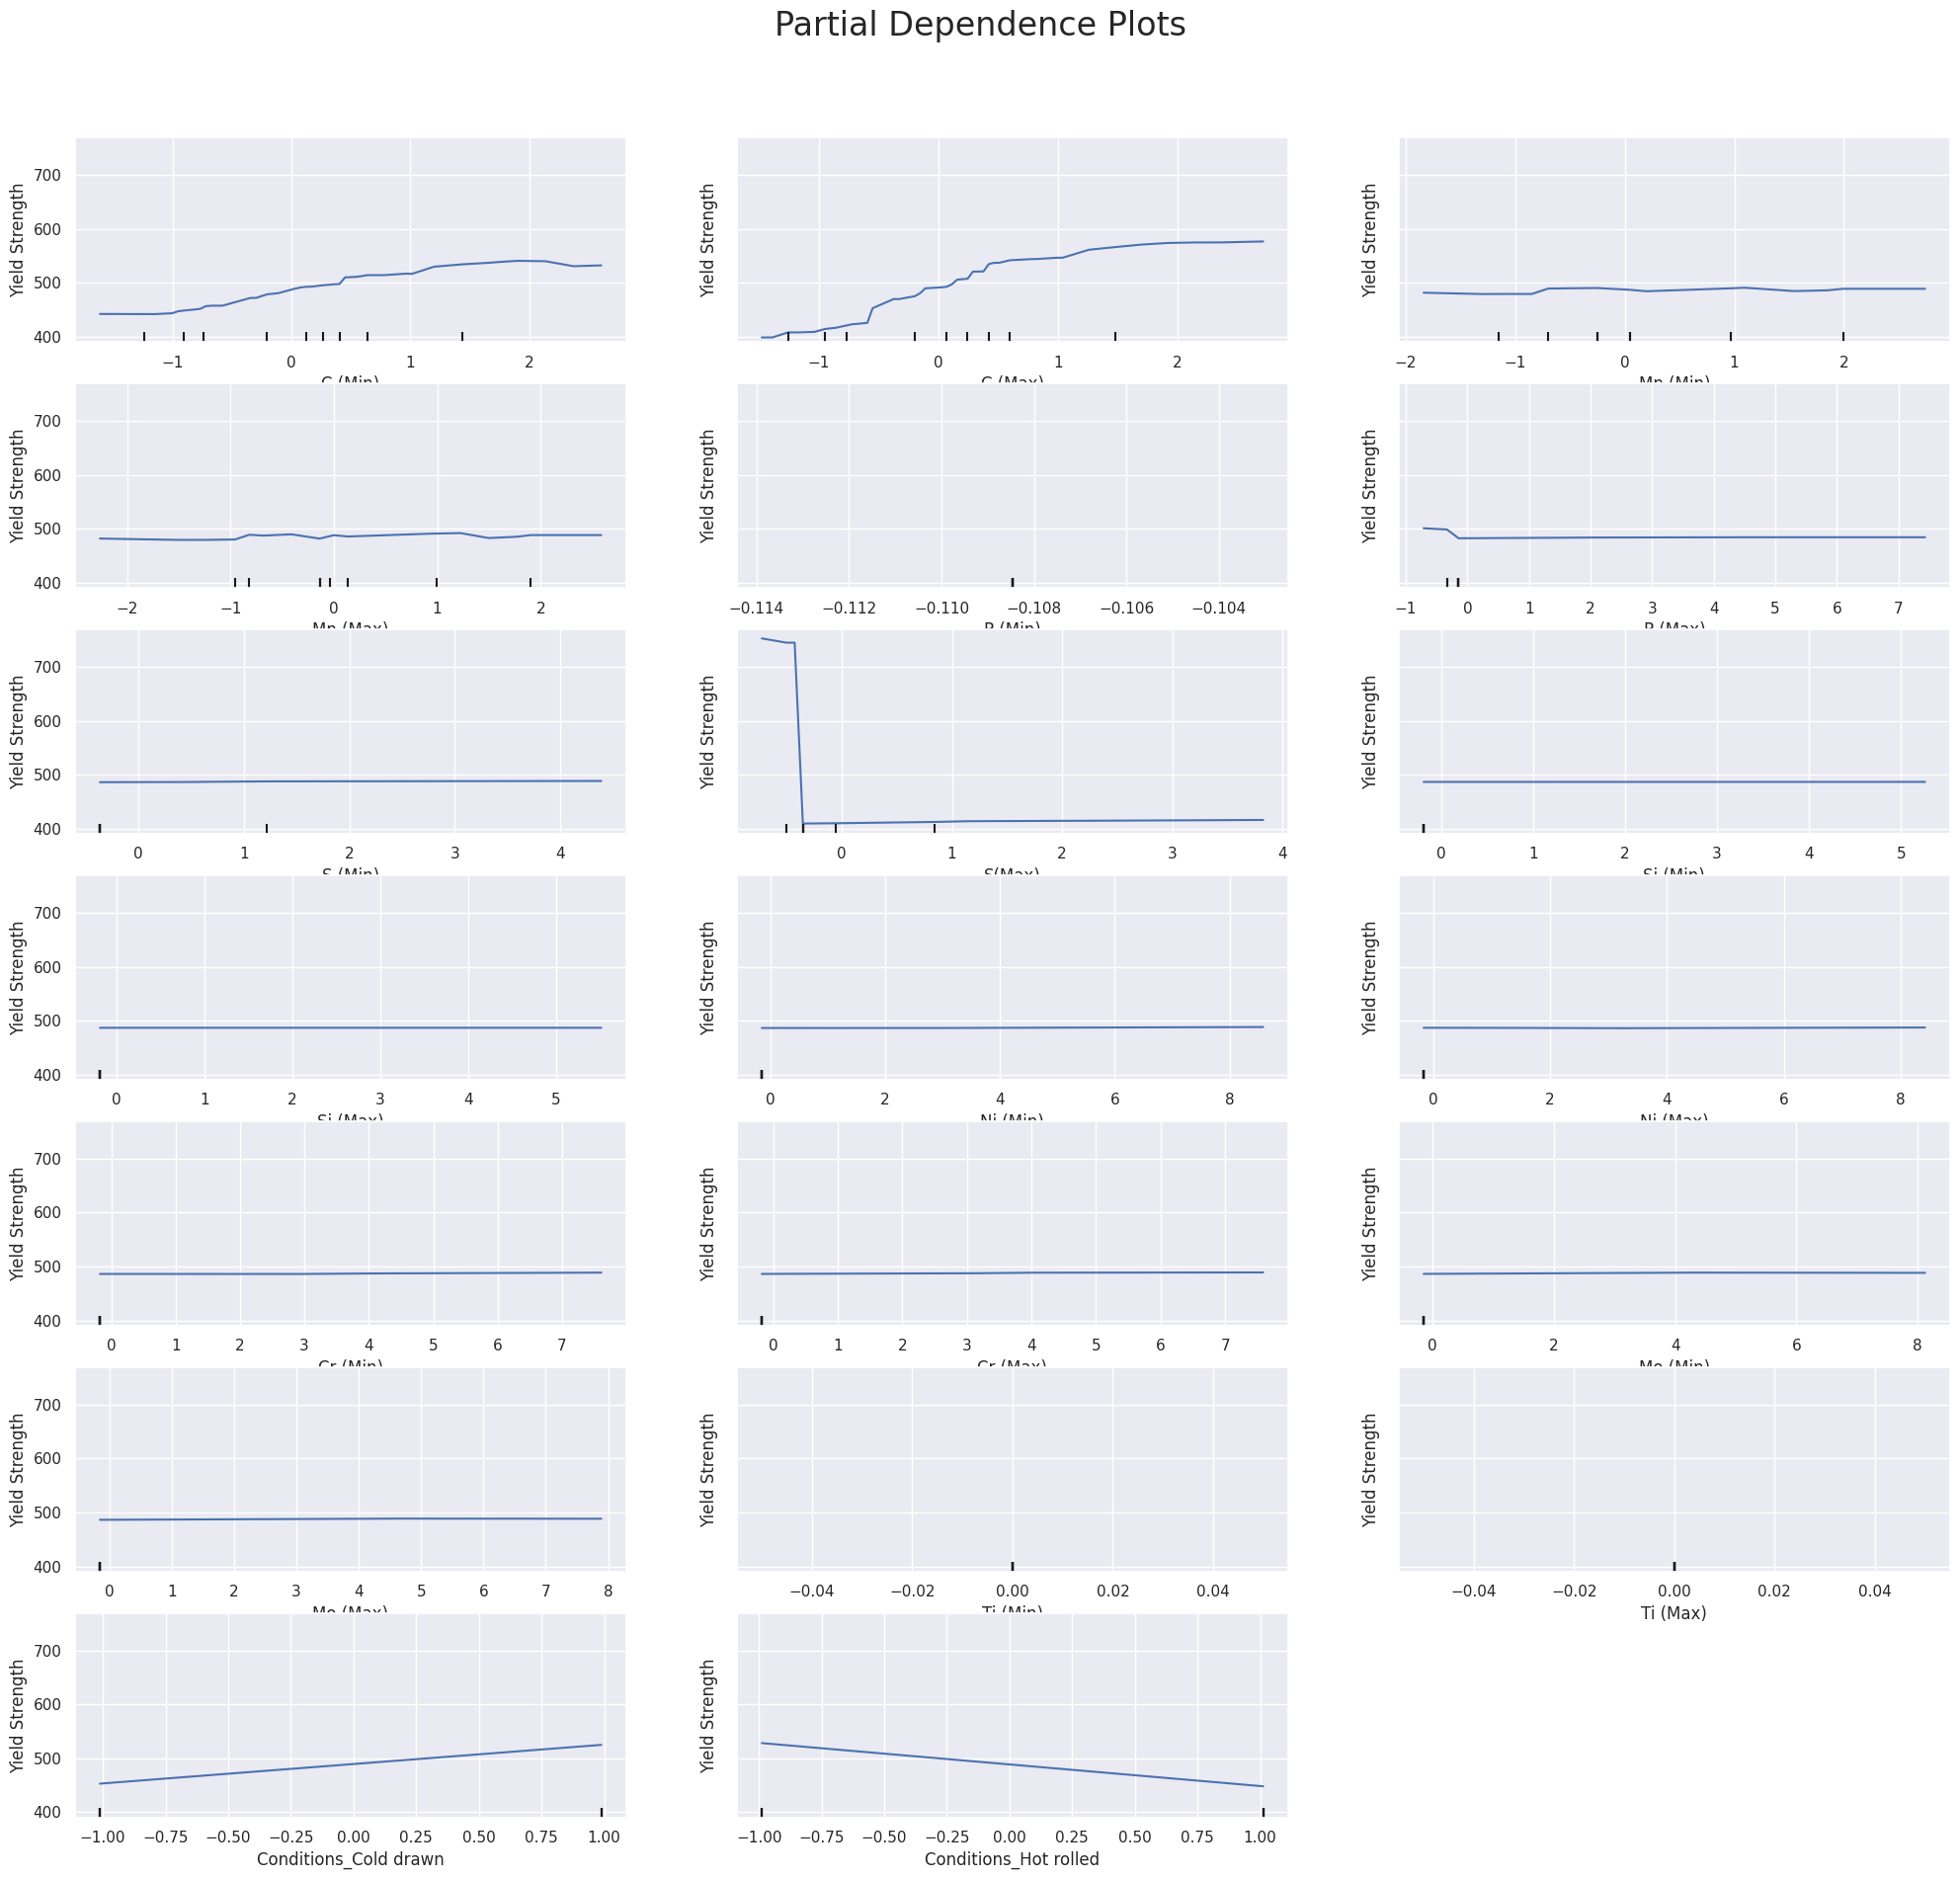

In [32]:
# Creating Partial Dependence Plots to understand the relationship between the Yield Strength and the features

# Create a new figure and axis object
fig, ax = plt.subplots(figsize=(20, 20))
# Create a partial dependence plot for specific features
disp = PartialDependenceDisplay.from_estimator(
    rfr_model,
    X_train,
    features=['C (Min)', 'C (Max)', 'Mn (Min)', 'Mn (Max)', 'P (Min)',
                   'P (Max)', 'S (Min)', 'S(Max)', 'Si (Min)', 'Si (Max)',
                   'Ni (Min)', 'Ni (Max)', 'Cr (Min)', 'Cr (Max)', 'Mo (Min)',
                   'Mo (Max)', 'Ti (Min)', 'Ti (Max)', 'Conditions_Cold drawn', 'Conditions_Hot rolled'],
    kind="average",
    ax = ax,
)

# Set the title for the overall figure
fig.suptitle("Partial Dependence Plots", fontsize=24)

# Iterate over each ax in the PartialDependenceDisplay object to set the Y-axis label
for row in disp.axes_:
    for ax in row:
        if ax is not None:
            ax.set_ylabel("Yield Strength")

# Adjust layout to make room for the overall title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


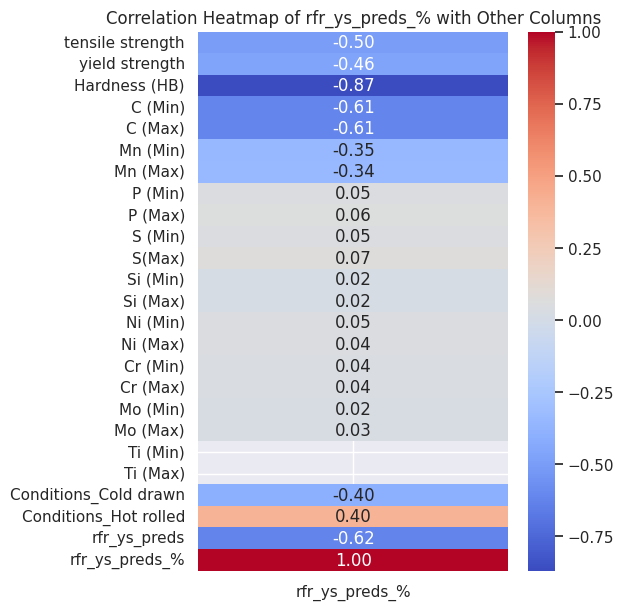

In [33]:
# Calculate the correlation matrix
rfr_corr = steel.corr()

# Plot the heatmap
plt.figure(figsize=(5, 7))
sns.heatmap(rfr_corr[['rfr_ys_preds_%']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of rfr_ys_preds_% with Other Columns')
plt.show()



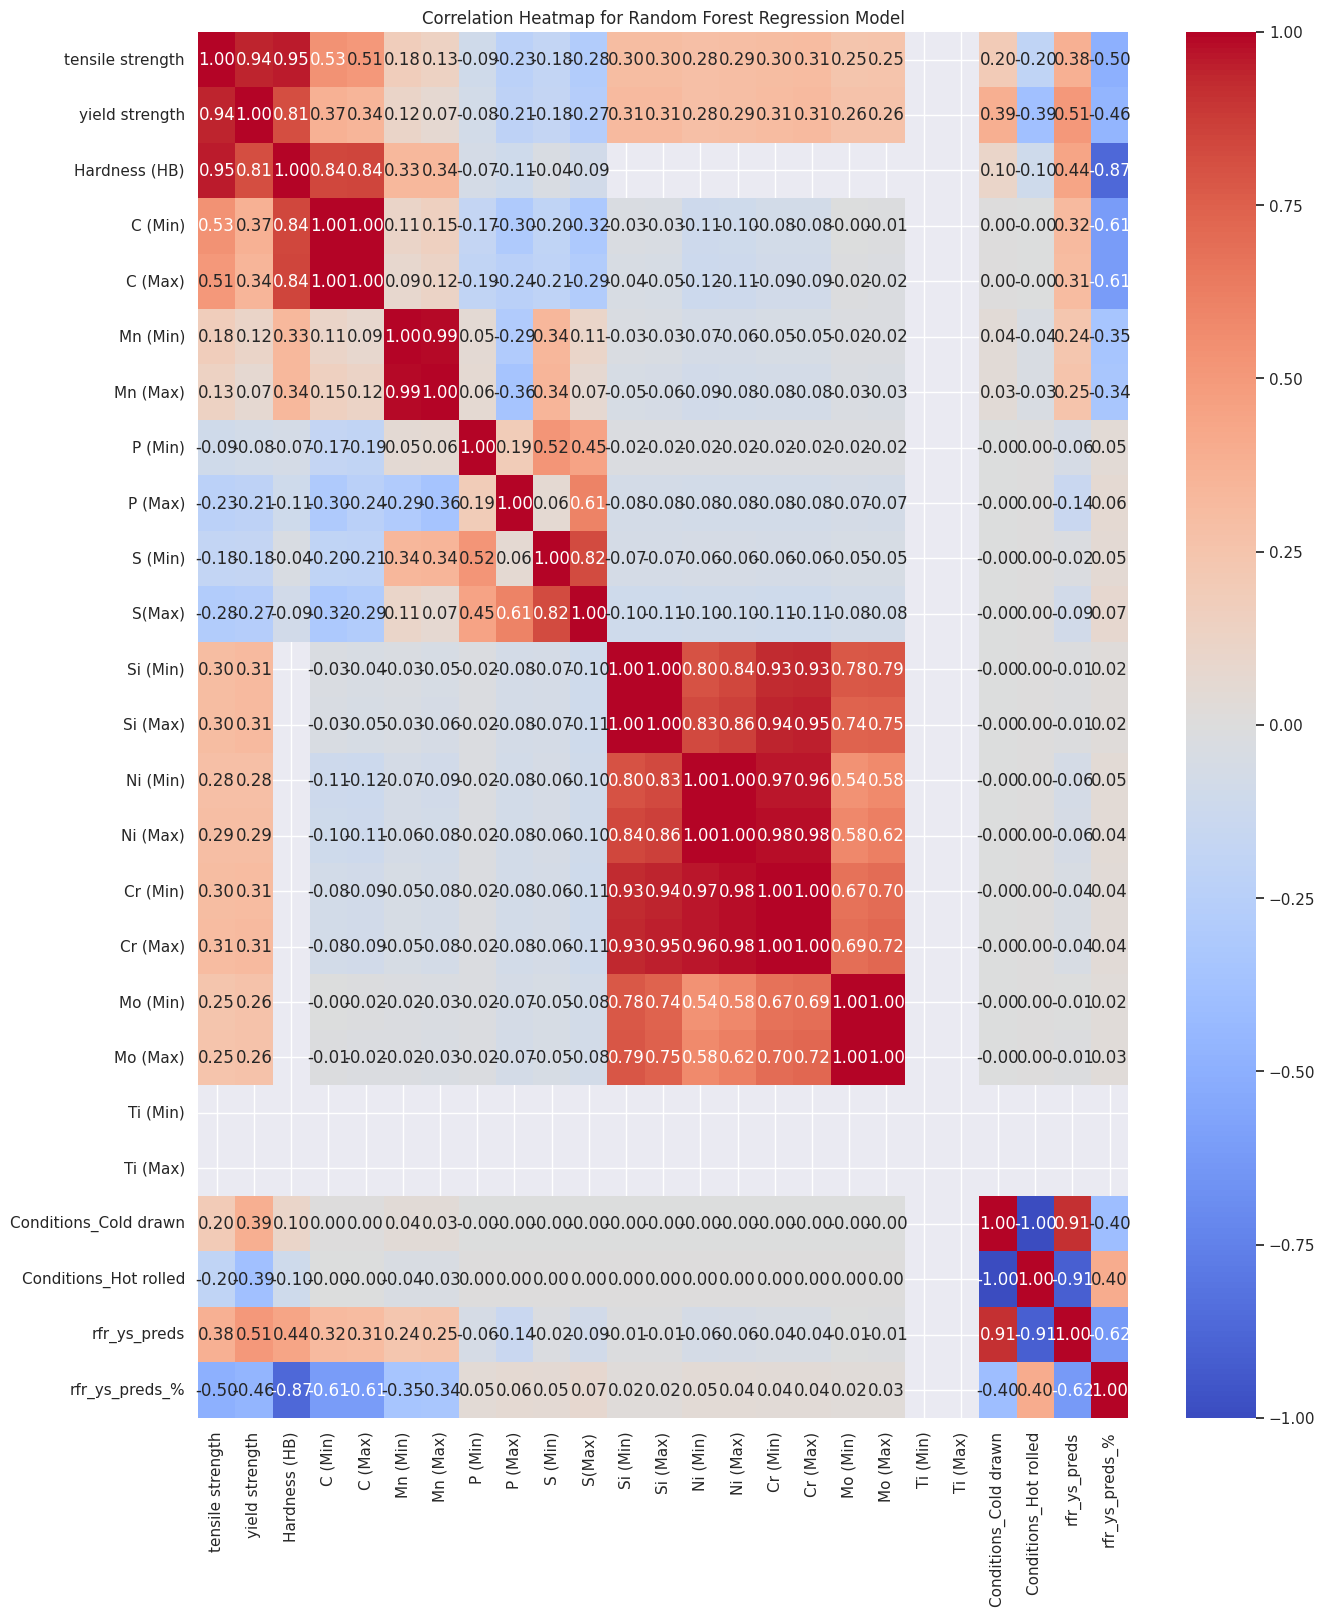

In [34]:
# Plot the heatmap for the entire correlation matrix
plt.figure(figsize=(15, 18))
sns.heatmap(rfr_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Random Forest Regression Model')
plt.show()



In [35]:
# creating a Random Forrest Regressor  GridSearch in order to improve results:

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [5, 50, 100],
    'max_depth': [None, 4, 8, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': [1, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
}

# Create a Random Forest Regression model
rfr_gs_model = RandomForestRegressor()

# Create a GridSearchCV instance
grid_search_rfr = GridSearchCV(rfr_gs_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV instance
grid_search_rfr.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_rfr.best_params_)
print("Best Score (Negative MSE):", grid_search_rfr.best_score_)

# Make predictions on the test set using the best model from grid search
best_model_rfr_gs = grid_search_rfr.best_estimator_
rfr_gs_predictions = best_model_rfr_gs.predict(X_test)

# Evaluate the best model
rfr_gs_mse = mean_squared_error(y_test, rfr_gs_predictions)
print("Grid Search CV Random Forest Regressor Mean Squared Error (Test set):", rfr_gs_mse)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (Negative MSE): -6034.605286659821
Grid Search CV Random Forest Regressor Mean Squared Error (Test set): 5082.182108590878


In [36]:
# creating columns for the model predictions and the percent error
steel["rfr_ys_gs_preds"] = best_model_rfr_gs.predict(X)
steel["rfr_ys_gs_preds_%"] = abs(100 * (steel["rfr_ys_gs_preds"] - steel["yield strength"]) / steel["yield strength"])

# Create a DataFrame to store predictions with absolute error less or equal to E %
good_ys_gs_preds_rfr = steel["rfr_ys_gs_preds_%"] <= E

# Count the number of "Good" predictions
good_count = good_ys_gs_preds_rfr.value_counts()[True]

# Calculate the percentage of "Good" predictions
gs_rfr_percentage_good = (good_count / len(steel["rfr_ys_gs_preds_%"])) * 100

print("The percentage of Yield Strength Grid Search RFR Predictions within E % of Actual value is:", gs_rfr_percentage_good)


The percentage of Yield Strength Grid Search RFR Predictions within E % of Actual value is: 21.511627906976745


In [37]:
# Printing Grid Search imporvement:
print("Percentage GridSearch CV improved the Random Forest Regressor model by:", gs_rfr_percentage_good - rfr_percentage_good)

# Update the "models"
models = update_models(models, "GridSearch CV Random Forest Regression", rfr_gs_mse, gs_rfr_percentage_good)

#Ensure the results were saved to models df
print(models)

Percentage GridSearch CV improved the Random Forest Regressor model by: 0.5813953488372086
                                    Model          MSE  Predictions % below E
0         Simple Random Forest Regression  3763.041410              20.930233
1  GridSearch CV Random Forest Regression  5082.182109              21.511628


In [38]:
# Attempting a Linear Regressor

# Define the parameter grid for Linear Regression with Polynomial Features and Ridge Regularization on the Steel DF
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'polynomialfeatures__interaction_only': [True, False],
    'polynomialfeatures__include_bias': [True, False],
    'ridge__alpha': [0.01, 0.1, 1.0],
    'ridge__solver': ['auto', 'svd', 'cholesky'],
    'ridge__random_state': [42]
}

# Create a pipeline with Polynomial Features and Ridge Regression
lr_poly_reg_model = make_pipeline(PolynomialFeatures(), Ridge())

# Create a GridSearchCV instance
grid_search_lr_poly_reg = GridSearchCV(lr_poly_reg_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV instance
grid_search_lr_poly_reg.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_lr_poly_reg.best_params_)
print("Best Score (Negative MSE):", grid_search_lr_poly_reg.best_score_)

# Make predictions on the test set using the best model from grid search
best_model_lr_poly_reg = grid_search_lr_poly_reg.best_estimator_
lr_poly_reg_predictions = best_model_lr_poly_reg.predict(X_test)

# Evaluate the best model
lr_poly_reg_mse = mean_squared_error(y_test, lr_poly_reg_predictions)
print("Grid Search CV Linear Regressor with Polynomial Features and Ridge Regularization Mean Squared Error (Test set):", lr_poly_reg_mse)


Best Parameters: {'polynomialfeatures__degree': 1, 'polynomialfeatures__include_bias': False, 'polynomialfeatures__interaction_only': True, 'ridge__alpha': 0.1, 'ridge__random_state': 42, 'ridge__solver': 'auto'}
Best Score (Negative MSE): -14752.83171383431
Grid Search CV Linear Regressor with Polynomial Features and Ridge Regularization Mean Squared Error (Test set): 17671.165926059428


In [39]:
# creating a columns for the predictions and the percent error
steel["lr_ys_gs_preds"] = best_model_lr_poly_reg.predict(X)
steel["lr_ys_gs_preds_%"] = abs(100 * (steel["lr_ys_gs_preds"] - steel["yield strength"]) / steel["yield strength"])

# Create a DataFrame to store predictions with absolute error less or equal to E%
good_ys_gs_preds_lr = steel["lr_ys_gs_preds_%"] <= E

# Count the number of "Good" predictions
good_count = good_ys_gs_preds_lr.value_counts()[True]

# Calculate the percentage of "Good" predictions
lr_percentage_good = (good_count / len(steel["lr_ys_gs_preds_%"])) * 100
print("The percentage of Yield Strength Grid Search Poly Regressor Predictions within E % of Actual value is:", lr_percentage_good)

# Update the "models"
models = update_models(models, "Polynomial Linear Regression", lr_poly_reg_mse, lr_percentage_good)

#Ensure the results were saved to models df
print(models)

The percentage of Yield Strength Grid Search Poly Regressor Predictions within E % of Actual value is: 3.488372093023256
                                    Model           MSE  Predictions % below E
0         Simple Random Forest Regression   3763.041410              20.930233
1  GridSearch CV Random Forest Regression   5082.182109              21.511628
2            Polynomial Linear Regression  17671.165926               3.488372


In [40]:
# Trying to predict Yield Strength using Deep Neural Network.

# Define the neural network architecture

# Define the neural network architecture with L2 regularization
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])


# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
nn_mse = nn_model.evaluate(X_test, y_test)
# Generate predictions using the trained model
nn_predictions = nn_model.predict(X_test)
print("Neural Network Mean Squared Error:", nn_mse)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 28740.2754
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
Neural Network Mean Squared Error: 28074.615234375


In [41]:
# Generate predictions using the trained model using X_scaled
steel['nn_ys_preds'] = nn_model.predict(X)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [42]:
# creating a column for the percentage of the relative error for each row
steel["nn_ys_preds_%"] = abs(100 * (steel["nn_ys_preds"] - steel["yield strength"]) / steel["yield strength"])

# Create a DataFrame to store predictions with absolute error less or equal to E %
good_ys_preds_nn = steel["nn_ys_preds_%"] <= E

# Count the number of "Good" predictions
good_count_nn = good_ys_preds_nn.value_counts()[True]

# Calculate the percentage of "Good" predictions
nn_percentage_good = (good_count_nn / len(steel["nn_ys_preds_%"])) * 100
print("For Deep Network, the percentage of Yield Strength Predictions within E % of Actual value is:", nn_percentage_good)

# Update the "models"
models = update_models(models, "Deep Neural Network Regression", nn_mse, nn_percentage_good)

#Ensure the results were saved to models df
print(models)

For Deep Network, the percentage of Yield Strength Predictions within E % of Actual value is: 6.395348837209303
                                    Model           MSE  Predictions % below E
0         Simple Random Forest Regression   3763.041410              20.930233
1  GridSearch CV Random Forest Regression   5082.182109              21.511628
2            Polynomial Linear Regression  17671.165926               3.488372
3          Deep Neural Network Regression  28074.615234               6.395349


In [43]:
# creating an xgboost regression model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)


# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print("XGBoost Mean Squared Error:", xgb_mse)

# creating a columns for the predictions using the trained model using X_scaled and the percent error
steel['xgb_ys_preds'] = xgb_model.predict(X)
steel["xgb_ys_preds_%"] = abs(100 * (steel["xgb_ys_preds"] - steel["yield strength"]) / steel["yield strength"])

# Create a DataFrame to store predictions with absolute error less or equal to E %
good_ys_preds_xgb = steel["xgb_ys_preds_%"] <= E
print(good_ys_preds_xgb.value_counts())
# Count the number of "Good" predictions
good_count_xgb = good_ys_preds_xgb.value_counts()[True]

# Calculate the percentage of "Good" predictions
percentage_good_xgb = (good_count_xgb / len(steel["xgb_ys_preds_%"])) * 100

#printing the error %
print("For XGBoost, the percentage of Yield Strength Predictions within E % of Actual value is:", percentage_good_xgb)

# Update the "models"
models = update_models(models, "XGBoost Regression", xgb_mse, percentage_good_xgb)

#Ensure the results were saved to models df
print(models)

XGBoost Mean Squared Error: 6836.026329393591
xgb_ys_preds_%
False    139
True      33
Name: count, dtype: int64
For XGBoost, the percentage of Yield Strength Predictions within E % of Actual value is: 19.186046511627907
                                    Model           MSE  Predictions % below E
0         Simple Random Forest Regression   3763.041410              20.930233
1  GridSearch CV Random Forest Regression   5082.182109              21.511628
2            Polynomial Linear Regression  17671.165926               3.488372
3          Deep Neural Network Regression  28074.615234               6.395349
4                      XGBoost Regression   6836.026329              19.186047


In [44]:
# Getting the feature importances from XGBoost Model
feature_importances = xgb_model.feature_importances_

# Print feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance:.3f}")

C (Min): 0.008
C (Max): 0.037
Mn (Min): 0.006
Mn (Max): 0.000
P (Min): 0.000
P (Max): 0.002
S (Min): 0.001
S(Max): 0.922
Si (Min): 0.004
Si (Max): 0.000
Ni (Min): 0.000
Ni (Max): 0.000
Cr (Min): 0.000
Cr (Max): 0.000
Mo (Min): 0.000
Mo (Max): 0.000
Ti (Min): 0.000
Ti (Max): 0.000
Conditions_Cold drawn: 0.021
Conditions_Hot rolled: 0.000


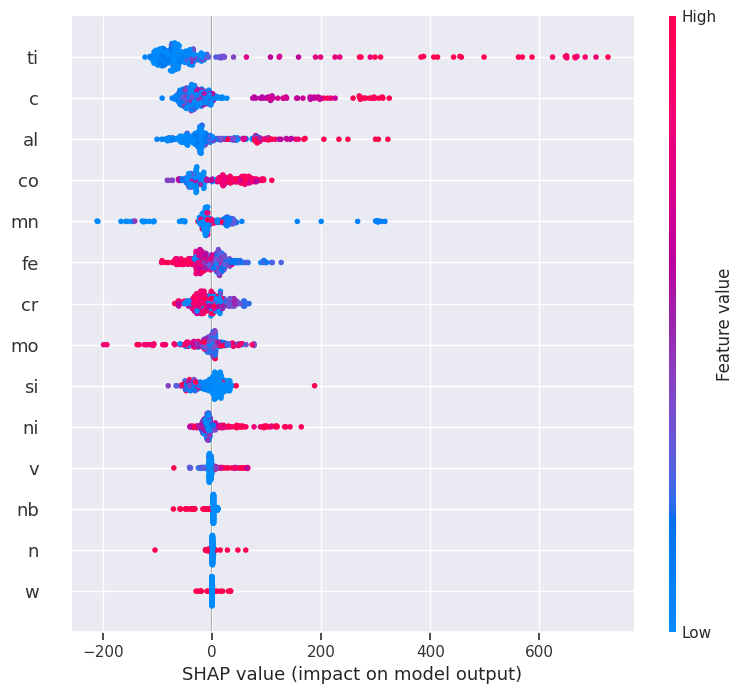

In [ ]:
# Creating a SHAP for the XGBoost Model
# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Visualize SHAP values
shap.summary_plot(shap_values, X)

In [45]:
# Define the parameter grid for SVR
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel type: linear, polynomial, radial basis function
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf' and 'poly' kernels
}

# Create an SVR model
svr_model = SVR()

# Create a GridSearchCV instance
grid_search_svr = GridSearchCV(svr_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)

# Fit the GridSearchCV instance
grid_search_svr.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search_svr.best_params_)
print("Best Score (Negative MSE):", grid_search_svr.best_score_)

# Make predictions on the test set using the best model from grid search
best_model_svr = grid_search_svr.best_estimator_
svr_predictions = best_model_svr.predict(X_test)

# Evaluate the best model
svr_mse = mean_squared_error(y_test, svr_predictions)
print("Grid Search CV Support Vector Regression Mean Squared Error (Test set):", svr_mse)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Score (Negative MSE): -30669.777196915587
Grid Search CV Support Vector Regression Mean Squared Error (Test set): 38578.18488230129


In [46]:
# creating a columns for the predictions and the percent error
steel["svr_ys_gs_preds"] = best_model_svr.predict(X)
steel["svr_ys_gs_preds_%"] = abs(100 * (steel["svr_ys_gs_preds"] - steel["yield strength"]) / steel["yield strength"])

# Create a DataFrame to store predictions with absolute error less or equal to E %
good_ys_gs_preds_svr = steel["svr_ys_gs_preds_%"] <= E

# Count the number of "Good" predictions
good_count_svr = good_ys_gs_preds_svr.value_counts()[True]

# Calculate the percentage of "Good" predictions
percentage_good_svr = (good_count_svr / len(steel["svr_ys_gs_preds_%"])) * 100
print("For Grid Search SVR, the percentage of Yield Strength Predictions within E % of Actual value is:", percentage_good_svr)

# Update the "models"
models = update_models(models, "GridSearch CV Support Vector Regressor", svr_mse, percentage_good_svr)

#Ensure the results were saved to models df
print(models)

For Grid Search SVR, the percentage of Yield Strength Predictions within E % of Actual value is: 24.418604651162788
                                    Model           MSE  Predictions % below E
0         Simple Random Forest Regression   3763.041410              20.930233
1  GridSearch CV Random Forest Regression   5082.182109              21.511628
2            Polynomial Linear Regression  17671.165926               3.488372
3          Deep Neural Network Regression  28074.615234               6.395349
4                      XGBoost Regression   6836.026329              19.186047
5  GridSearch CV Support Vector Regressor  38578.184882              24.418605


In [ ]:
# Results analysis

In [47]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 1006 to 9310
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tensile strength       172 non-null    int64  
 1   yield strength         172 non-null    int64  
 2   Hardness (HB)          132 non-null    float64
 3   C (Min)                172 non-null    float64
 4   C (Max)                172 non-null    float64
 5   Mn (Min)               172 non-null    float64
 6   Mn (Max)               172 non-null    float64
 7   P (Min)                172 non-null    float64
 8   P (Max)                172 non-null    float64
 9   S (Min)                172 non-null    float64
 10  S(Max)                 172 non-null    float64
 11  Si (Min)               172 non-null    float64
 12  Si (Max)               172 non-null    float64
 13  Ni (Min)               172 non-null    float64
 14  Ni (Max)               172 non-null    float64
 15  Cr (Min

In [48]:
#creating a dataframe containing predictions
yield_strength_pred = steel[["yield strength", "rfr_ys_preds", "rfr_ys_preds_%", "nn_ys_preds", "nn_ys_preds_%", "rfr_ys_gs_preds", "rfr_ys_gs_preds_%",
                            "lr_ys_gs_preds", "lr_ys_gs_preds_%", "svr_ys_gs_preds", "svr_ys_gs_preds_%", "xgb_ys_preds", "xgb_ys_preds_%"]]
yield_strength_pred = yield_strength_pred.round(1)

# visualizing the prediction cloumns and rows
yield_strength_pred.head()

,yield strength,rfr_ys_preds,rfr_ys_preds_%,nn_ys_preds,nn_ys_preds_%,rfr_ys_gs_preds,rfr_ys_gs_preds_%,lr_ys_gs_preds,lr_ys_gs_preds_%,svr_ys_gs_preds,svr_ys_gs_preds_%,xgb_ys_preds,xgb_ys_preds_%
SAE Grade,,,,,,,,,,,,,
1006,165,386.4,134.2,174.699997,5.9,404.5,145.2,264.0,60.0,383.9,132.7,337.600006,104.6
1006,285,503.6,76.7,236.600006,17.0,510.0,78.9,338.6,18.8,471.3,65.4,542.900024,90.5
1008,170,386.4,127.3,175.000000,2.9,404.5,137.9,208.7,22.7,385.1,126.6,337.600006,98.6
1008,285,503.6,76.7,239.300003,16.0,508.9,78.6,283.3,0.6,472.5,65.8,542.900024,90.5
1010,180,389.6,116.5,180.399994,0.2,415.7,130.9,249.4,38.5,390.0,116.7,334.100006,85.6


In [49]:
# Convert all columns to float with 1 decimal place
yield_strength_pred = yield_strength_pred.apply(lambda x: x.astype(float).round(1))
yield_strength_pred.head()

# Creating an interactive table using colob's feature in order to inspect the prediction in each row
data_table.enable_dataframe_formatter()
yield_strength_pred

,yield strength,rfr_ys_preds,rfr_ys_preds_%,nn_ys_preds,nn_ys_preds_%,rfr_ys_gs_preds,rfr_ys_gs_preds_%,lr_ys_gs_preds,lr_ys_gs_preds_%,svr_ys_gs_preds,svr_ys_gs_preds_%,xgb_ys_preds,xgb_ys_preds_%
SAE Grade,,,,,,,,,,,,,
1006,165.0,386.4,134.2,174.7,5.9,404.5,145.2,264.0,60.0,383.9,132.7,337.6,104.6
1006,285.0,503.6,76.7,236.6,17.0,510.0,78.9,338.6,18.8,471.3,65.4,542.9,90.5
1008,170.0,386.4,127.3,175.0,2.9,404.5,137.9,208.7,22.7,385.1,126.6,337.6,98.6
1008,285.0,503.6,76.7,239.3,16.0,508.9,78.6,283.3,0.6,472.5,65.8,542.9,90.5
1010,180.0,389.6,116.5,180.4,0.2,415.7,130.9,249.4,38.5,390.0,116.7,334.1,85.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,760.0,455.2,40.1,227.0,70.1,465.1,38.8,232.3,69.4,426.9,43.8,361.9,52.4
9255,1100.0,584.6,46.9,295.3,73.2,573.5,47.9,304.0,72.4,525.3,52.2,586.5,46.7
9255,895.0,469.7,47.5,239.3,73.3,474.7,47.0,229.3,74.4,438.0,51.1,363.3,59.4


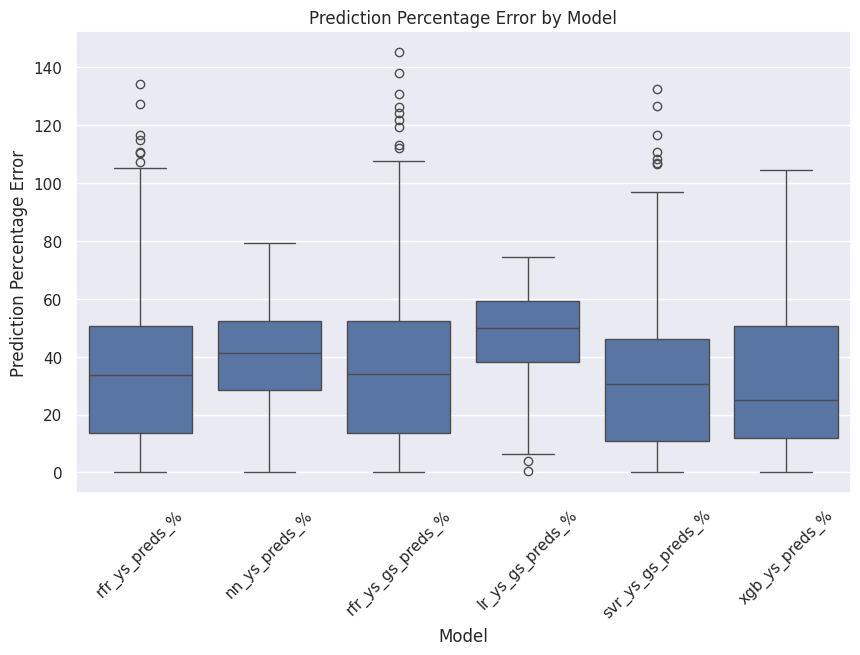

In [50]:
# Extract prediction percentage error columns
prediction_percentages = yield_strength_pred.filter(like='_preds_%')

# Melt the DataFrame to long format for plotting
melted_data = prediction_percentages.melt(var_name='Model', value_name='Prediction Percentage Error')

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Prediction Percentage Error', data=melted_data)
plt.xticks(rotation=45)
plt.title('Prediction Percentage Error by Model')
plt.show()

In [51]:
# Saving to an Excel file (optional)
models.to_excel("model_performance.xlsx", index=False)

#printing the models summary results:
print(models)
print("Enventhough Simple Random Forrest Regressor had the least MSE, XGBoost Regressor had lower prediction prrors below E")

                                    Model           MSE  Predictions % below E
0         Simple Random Forest Regression   3763.041410              20.930233
1  GridSearch CV Random Forest Regression   5082.182109              21.511628
2            Polynomial Linear Regression  17671.165926               3.488372
3          Deep Neural Network Regression  28074.615234               6.395349
4                      XGBoost Regression   6836.026329              19.186047
5  GridSearch CV Support Vector Regressor  38578.184882              24.418605
Enventhough Simple Random Forrest Regressor had the least MSE, XGBoost Regressor had lower prediction prrors below E


In [52]:
# Initialize a DataFrame to store the top 10 prediction errors for each model
top_10_errors = pd.DataFrame(index=yield_strength_pred.index)

# Loop through each prediction error column and extract the top 10 values
for column in yield_strength_pred.filter(like='_preds_%').columns:
    top_10_errors[f'top_10_{column}'] = yield_strength_pred[column].nlargest(len(yield_strength_pred.index)).values

# Display the new DataFrame containing the top 10 errors for each column
print(top_10_errors)

           top_10_rfr_ys_preds_%  top_10_nn_ys_preds_%  \
SAE Grade                                                
1006                       134.2                  79.3   
1006                       127.3                  74.2   
1008                       116.5                  73.3   
1008                       114.8                  73.2   
1010                       110.8                  71.1   
...                          ...                   ...   
8740                         1.4                   4.4   
9255                         0.8                   3.6   
9255                         0.7                   2.9   
9310                         0.7                   2.1   
9310                         0.1                   0.2   

           top_10_rfr_ys_gs_preds_%  top_10_lr_ys_gs_preds_%  \
SAE Grade                                                      
1006                          145.2                     74.4   
1006                          137.9                  

In [ ]:
#Predicting the Tensile Strentgh using Random Forrest REgressor

#defining y
y_1 = steel["tensile strength"]


# Split the data into training and testing sets
X_train, X_test, y_1_train, y_1_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

# tring Random Forest Regression model base on litterature
# Train the Random Forest Regression model
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_1_train)

# Make predictions on the test set
rfr_predictions = rfr_model.predict(X_test)

# Evaluate the model
ts_rfr_mse = mean_squared_error(y_1_test, rfr_predictions)
print("Random Forrest Regressor Mean Squared Error for Tensile Strength:", ts_rfr_mse)

Random Forrest Regressor Mean Squared Error for Tensile Strength: 12460.49117985712


In [ ]:

#creating a pd df ts_rfr_preds
ts_rfr_preds = pd.DataFrame()
ts_rfr_preds["tensile strength"] = steel["tensile strength"]

# adding a prediction column using X to the steel dataframe
ts_rfr_preds["ts_rfr_preds"] =rfr_model.predict(X)

# creating a column for the percentage of the relative error for each row
ts_rfr_preds["ts_rfr_preds_%"] = abs(100 * (ts_rfr_preds["ts_rfr_preds"] - ts_rfr_preds["tensile strength"]) / ts_rfr_preds["tensile strength"])

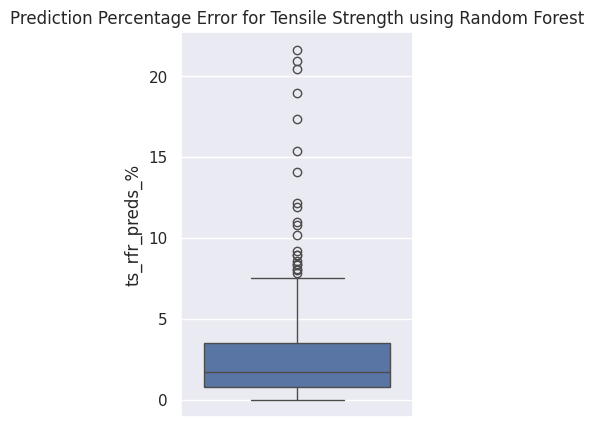

In [ ]:
# Create box plot
plt.figure(figsize=(3, 5))
sns.boxplot(y=ts_rfr_preds["ts_rfr_preds_%"])
plt.title('Prediction Percentage Error for Tensile Strength using Random Forest')
plt.show()

In [ ]:
# I am arbitrarily assigning any predictions that absolute error is less or equal then E % to be "Good"
#% of Predictions Error for Tensile Strength using Random Forest less or equal to E %
good_preds = ts_rfr_preds["ts_rfr_preds_%"] <= E
bad_preds = ts_rfr_preds["ts_rfr_preds_%"] > E
good_preds.value_counts()


ts_rfr_preds_%
True     300
False     12
Name: count, dtype: int64

In [ ]:
#Predicting Elongation
# since Elongation is missing 9 data point, I'll re-load the df and remove the missing values:
steel_1 = pd.read_csv("steel_strength.csv")
steel_1.dropna(inplace=True)

# Set the "formula" column as the index
steel_1.set_index("formula", inplace=True)
steel_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni0.192Mo0.0176V0.000112Nb0.0000616Co0.146Al0.00318Ti0.0185 to Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0.0786Mo0.00284V0.000765Nb0.0000600Co0.0369Al0.000619
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   c                 303 non-null    float64
 1   mn                303 non-null    float64
 2   si                303 non-null    float64
 3   cr                303 non-null    float64
 4   ni                303 non-null    float64
 5   mo                303 non-null    float64
 6   v                 303 non-null    float64
 7   n                 303 non-null    float64
 8   nb                303 non-null    float64
 9   co                303 non-null    float64
 10  w                 303 non-null    float64
 11  al                303 non-null    float64
 12  ti                303 non-null    float6

In [ ]:

# Fill NaN values with zeroes in specific columns
columns_to_fill = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']
steel_1[columns_to_fill] = steel_1[columns_to_fill].fillna(0)

#Creating a column for iron (fe)
# List of columns to subtract from 100
columns_to_subtract = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']

# Create the "fe" column by subtracting values from 100
steel_1["fe"] = 100 - steel_1[columns_to_subtract].sum(axis=1)

#seperating the features into X and target into y and scaling X
X = steel_1.drop(labels=["yield strength", "tensile strength", "elongation"], axis=1)

y_2 = steel_1["elongation"]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform the features
X_scaled = scaler.fit_transform(X)

# Display the scaled DataFrame
X.head()

,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,fe
formula,,,,,,,,,,,,,,
Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110Ni0.192Mo0.0176V0.000112Nb0.0000616Co0.146Al0.00318Ti0.0185,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,60.50
Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0.0000971Mo0.0179V0.00515N0.00163Nb0.0000614Co0.188W0.00729Al0.000845,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,60.98
Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111Ni0.173Mo0.0237V0.000113Nb0.0000619Co0.146Al0.00277Ti0.0176,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,61.61
Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109Ni0.188Mo0.00860V0.000112Nb0.0000612Co0.144Al0.00274Ti0.0184,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,62.43
Fe0.636C0.00881Mn0.000203Si0.00972Cr0.135Ni0.00892Mo0.0114V0.000109Nb0.0000600Co0.190Al0.000620,0.19,0.02,0.49,12.56,0.94,1.96,0.01,0.00,0.01,20.10,0.00,0.03,0.00,63.69


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train_2, y_test_2 = train_test_split(X, y_2, test_size=0.2, random_state=42)

In [ ]:
# tring Random Forest Regression model base on litterature
# Train the Random Forest Regression model
elon_rfr_model = RandomForestRegressor()
elon_rfr_model.fit(X_train, y_train_2)

# Make predictions on the test set
elon_rfr_predictions = elon_rfr_model.predict(X_test)

# Evaluate the model
elon_rfr_mse = mean_squared_error(y_test_2, elon_rfr_predictions)
print("Random Forrest Regressor Mean Squared Error for Elongation:", elon_rfr_mse)

Random Forrest Regressor Mean Squared Error for Elongation: 17.85505185245902


In [ ]:
#creating a pd df ts_rfr_preds
elon_rfr_preds = pd.DataFrame()
elon_rfr_preds["elongation"] = steel_1["elongation"]

# adding a prediction column using X to the steel dataframe
elon_rfr_preds["elon_rfr_preds"] =elon_rfr_model.predict(X)

# creating a column for the percentage of the relative error for each row
elon_rfr_preds["elon_rfr_preds_%"] = abs(100 * (elon_rfr_preds["elon_rfr_preds"] - elon_rfr_preds["elongation"]) / elon_rfr_preds["elongation"])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


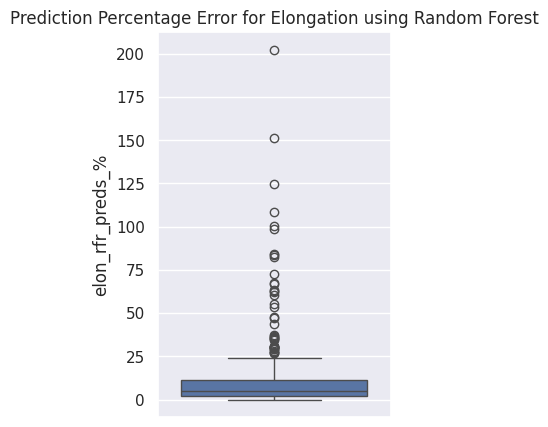

In [ ]:
# Create box plot for elongation error
plt.figure(figsize=(3, 5))
sns.boxplot(y=elon_rfr_preds["elon_rfr_preds_%"])
plt.title('Prediction Percentage Error for Elongation using Random Forest')
plt.show()

In [ ]:
# I am arbitrarily assigning any predictions that absolute error is less or equal then E % to be "Good" as above
#% of Predictions Error for Tensile Strength using Random Forest less or equal to E %
good_elon_preds = pd.DataFrame()
good_elon_preds = elon_rfr_preds["elon_rfr_preds_%"] <= E
bad_elon_preds = elon_rfr_preds["elon_rfr_preds_%"] > E
good_elon_preds.value_counts()

elon_rfr_preds_%
True     217
False     86
Name: count, dtype: int64